In [1]:
#!pip install kagglehub
#!pip install -U git+https://github.com/sloria/TextBlob.git@devfrom textblob import TextBlob
#pip3 install -U textblob
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

'''
fazer logistic regression com o mm numero de n
representacao dos dados llms e humanos

fazer duas classes - Humano vs Maquina

'''

# Download latest version
#path = kagglehub.dataset_download("starblasters8/human-vs-llm-text-corpus")

#print("Path to dataset files:", path)

'\nfazer logistic regression com o mm numero de n\nrepresentacao dos dados llms e humanos\n\nfazer duas classes - Humano vs Maquina\n\n'

In [2]:
df = pd.read_csv('data.csv')
df.head(5)
#df.tail(1)

,text,source,prompt_id,text_length,word_count
0,"Federal law supersedes state law, and cannabis...",Bloom-7B,0,967,157
1,Miles feels restless after working all day. He...,Bloom-7B,0,5068,778
2,So first of I am danish. That means that I fol...,Bloom-7B,0,1602,267
3,In this paper we present a novel rule-based ap...,Bloom-7B,0,5469,848
4,"Most social progressives, love democracy, and ...",Bloom-7B,0,2379,380


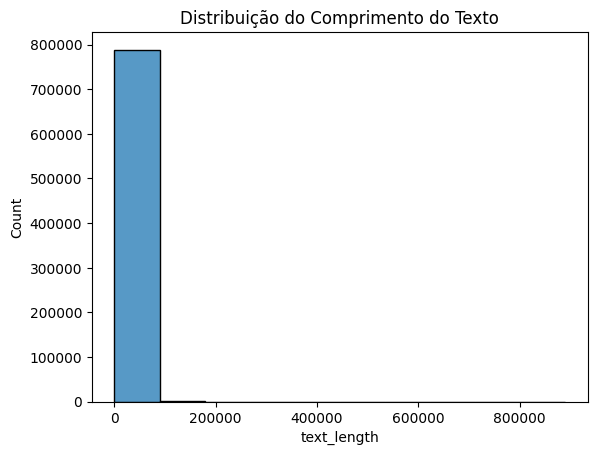

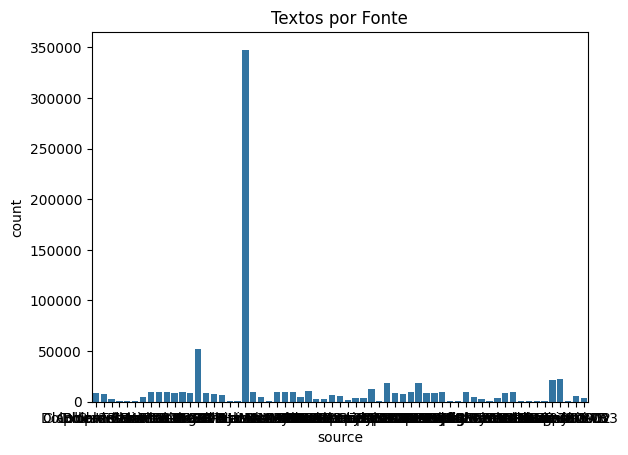

In [3]:
# Distribuição do comprimento do texto
sns.histplot(df['text_length'], bins=10, kde=False)
plt.title('Distribuição do Comprimento do Texto')
plt.show()

# Textos por fonte
sns.countplot(data=df, x='source')
plt.title('Textos por Fonte')
plt.show()

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Convertendo para lista
stop_words_list = list(stop_words)

#  matriz de frequência com CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_words_list)
X = vectorizer.fit_transform(df['text'])

print("Matriz de frequências criada:", X.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\volov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Matriz de frequências criada: (788922, 840230)


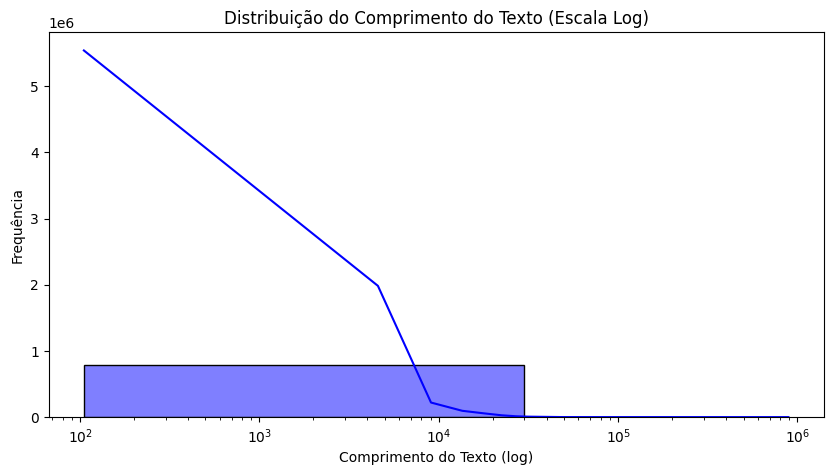

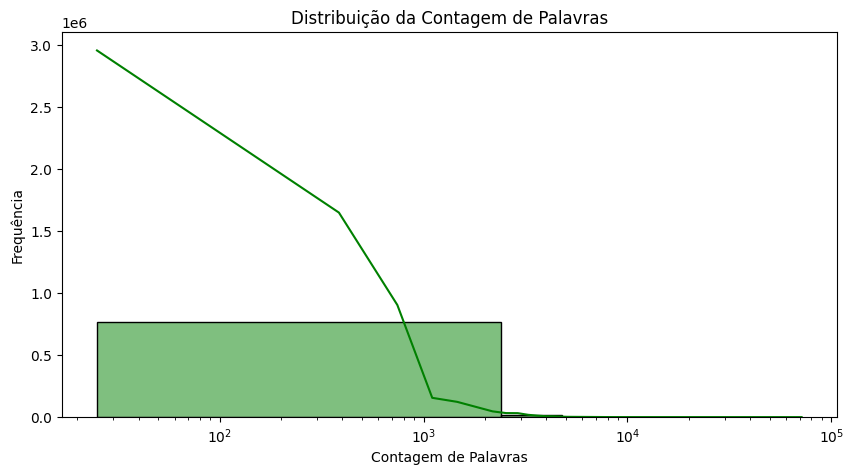

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='blue')
plt.xscale('log')
plt.title('Distribuição do Comprimento do Texto (Escala Log)')
plt.xlabel('Comprimento do Texto (log)')
plt.ylabel('Frequência')
plt.show()


# Distribuição de word_count
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color='green')
plt.xscale('log')
plt.title('Distribuição da Contagem de Palavras')
plt.xlabel('Contagem de Palavras')
plt.ylabel('Frequência')
plt.show()

C:\Users\volov\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


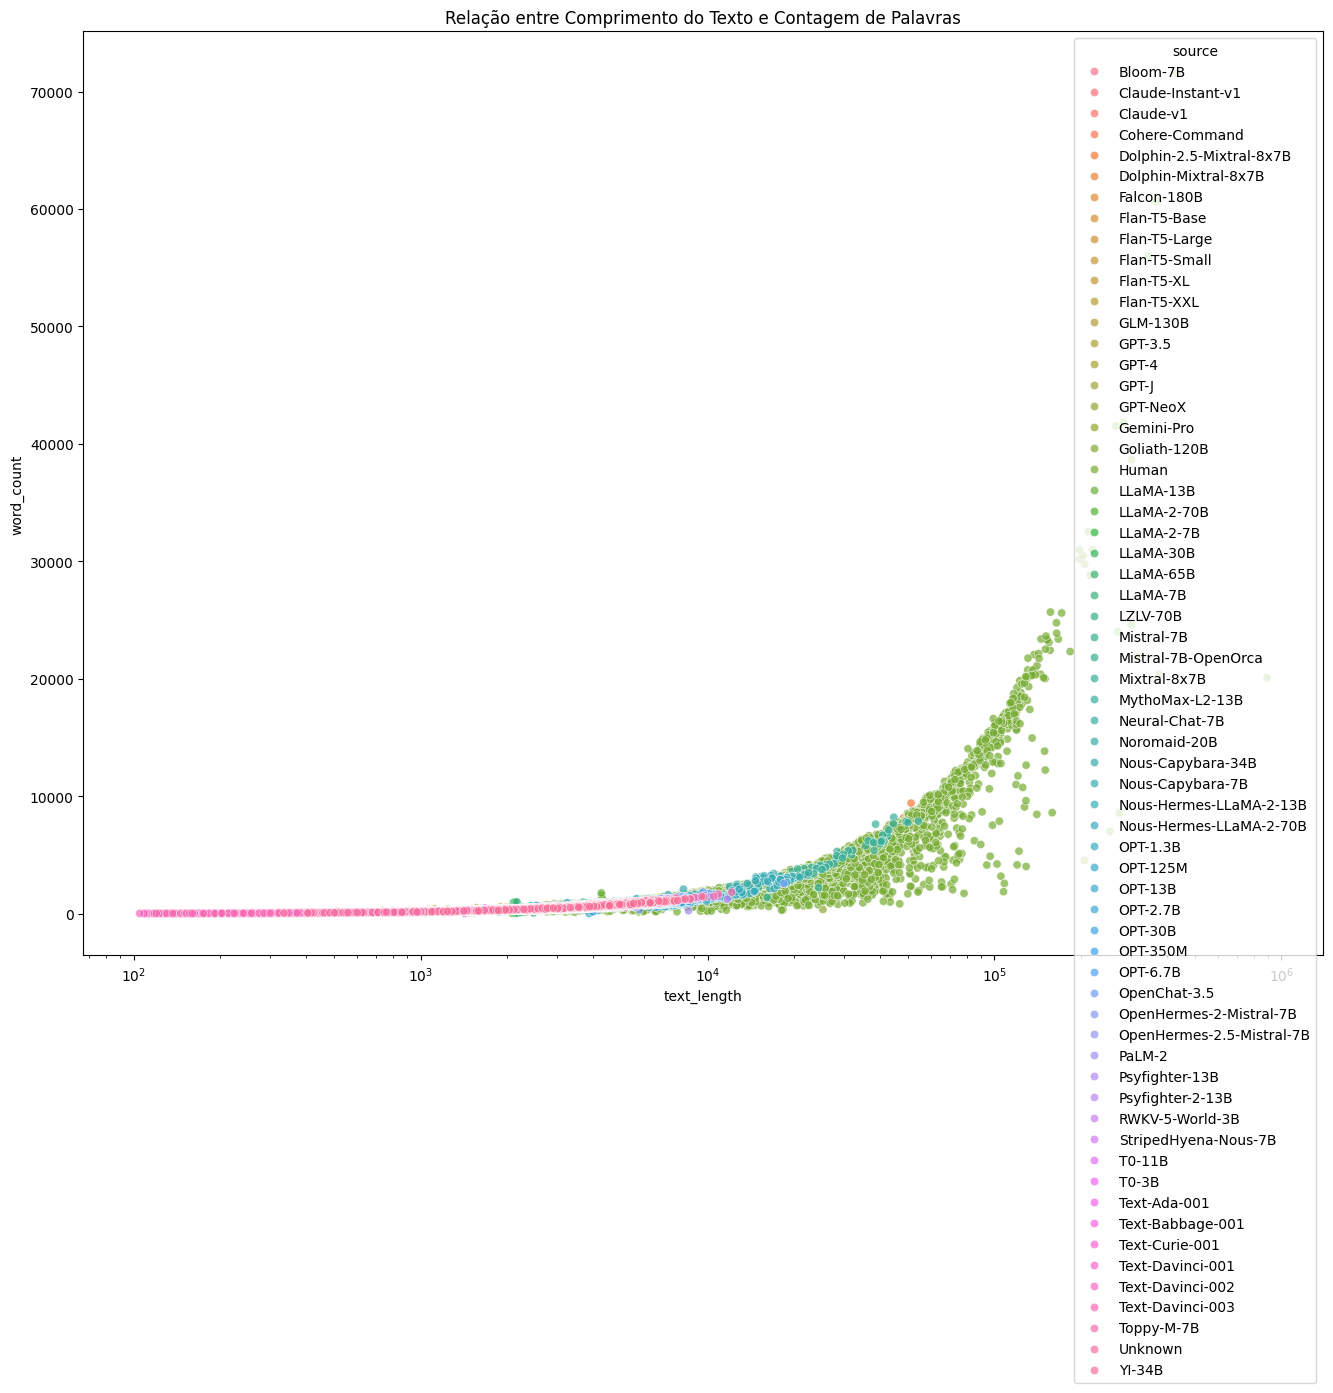

In [15]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x=df['text_length'], y=df['word_count'], hue=df['source'], alpha=0.7)
#tirar o human d
plt.title('Relação entre Comprimento do Texto e Contagem de Palavras')
#plt.xlabel('Comprimento do Texto')
#plt.ylabel('Contagem de Palavras')
#plt.legend(title='Source')
plt.xscale('log')
plt.show()
